In [2]:
# Load Libraries :

import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization

In [3]:
# To make our plots look nice, let us set a theme for our seaborn (sns) plots and also let us define the size 
# in which we would like to print the plot figures :

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [4]:
matches = pd.read_csv('matches.csv')

In [5]:
matches.shape
# 636 ROWS , 18 COLUMNS

(636, 18)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


##### Observations => Columns with Missing data are as follows :
1. city
2. winner
3. player_of_match
4. umpire1
5. umpire2
6. umpire3

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


##### Q1 : How many matches we’ve got in the dataset?

In [9]:
# Solution :
matches.count().id

636

In [10]:
# Alternative solution :
matches['id'].max()

636

##### Q2 : How many seasons we’ve got in the dataset? 

In [11]:
len(matches['season'].unique())

10

##### Q3 : Which Team had won by maximum runs?

In [12]:
matches['win_by_runs'].max()

146

In [13]:
matches.loc[matches.win_by_runs.idxmax()]['winner']

'Mumbai Indians'

##### NOTE :
idxmax will return the id of the maximumth value which in turn is fed into iloc that takes an index value and returns the row.

##### Q4 : Which Team had won by maximum wickets?

In [14]:
matches.loc[matches.win_by_wickets.idxmax()]['winner']

'Kolkata Knight Riders'

##### Q5 : Which Team had won by (closest margin) minimum runs?

In [43]:
matches.loc[matches.win_by_runs.idxmin()]['winner'] #INCORRECT

'Rising Pune Supergiant'

In [47]:
matches.loc[matches[matches.win_by_runs.ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

##### Q6 : Which Team had won by minimum wickets?

In [52]:
matches.loc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

##### Q7 : Which season had most number of matches?

In [95]:
#matches.groupby(['season']).size().reset_index(name='counts')

In [96]:
matches.groupby(['season']).size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64

In [97]:
matches.groupby(['season']).size().idxmax()

2013

##### COUNTPLOT :

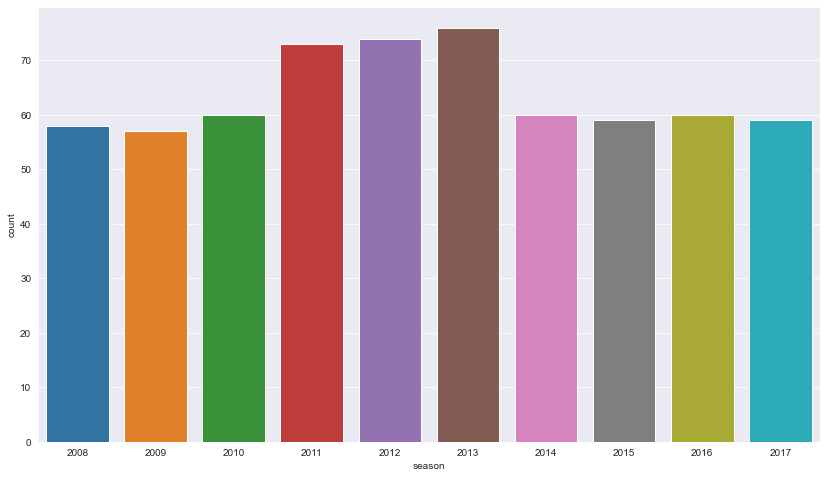

In [101]:
sns.countplot(x='season', data=matches)
plt.show()

##### Q8 : The most successful IPL Team

In [100]:
matches.groupby(['winner']).size().idxmax()

'Mumbai Indians'

##### COUNTPLOT :

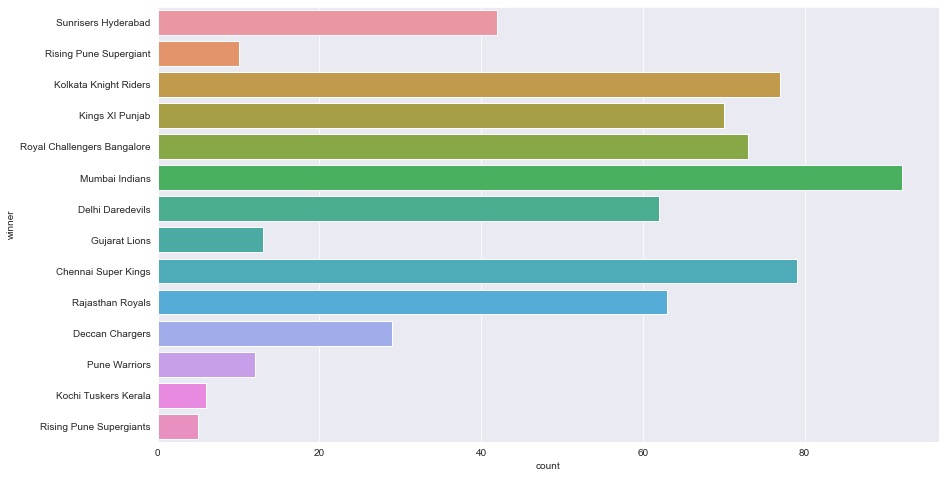

In [107]:
sns.countplot(y='winner', data=matches, orient='h')
plt.show()

##### BAR PLOT :

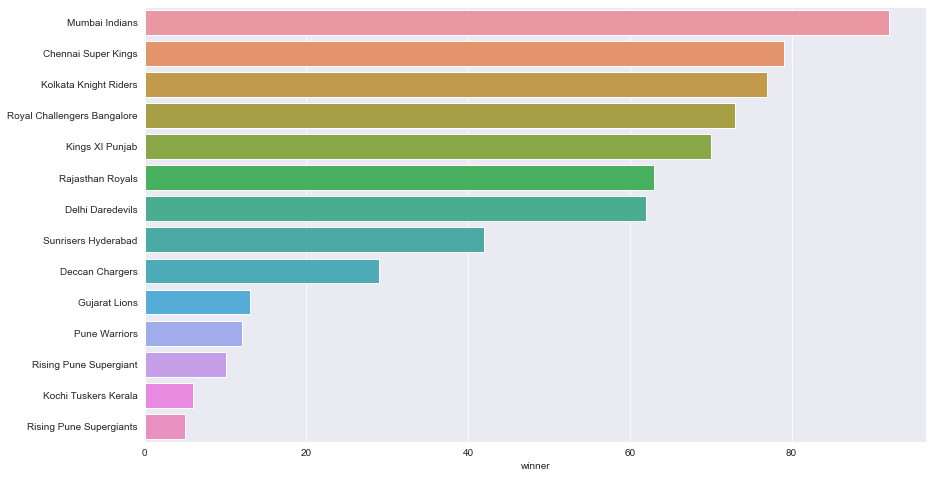

In [114]:
data = matches.winner.value_counts()
sns.barplot(x=data, y=data.index, orient='h')
plt.show()

##### Q9 : Top player of the match Winners

In [120]:
matches.groupby(['player_of_match']).size()

player_of_match
A Chandila            1
A Kumble              3
A Mishra              9
A Nehra               6
A Singh               1
                     ..
Washington Sundar     1
YK Pathan            16
YS Chahal             1
Yuvraj Singh          5
Z Khan                1
Length: 201, dtype: int64

In [118]:
matches.groupby(['player_of_match']).size().idxmax()

'CH Gayle'

##### BAR PLOT :

In [123]:
top_players = matches.player_of_match.value_counts()[:10]
top_players

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

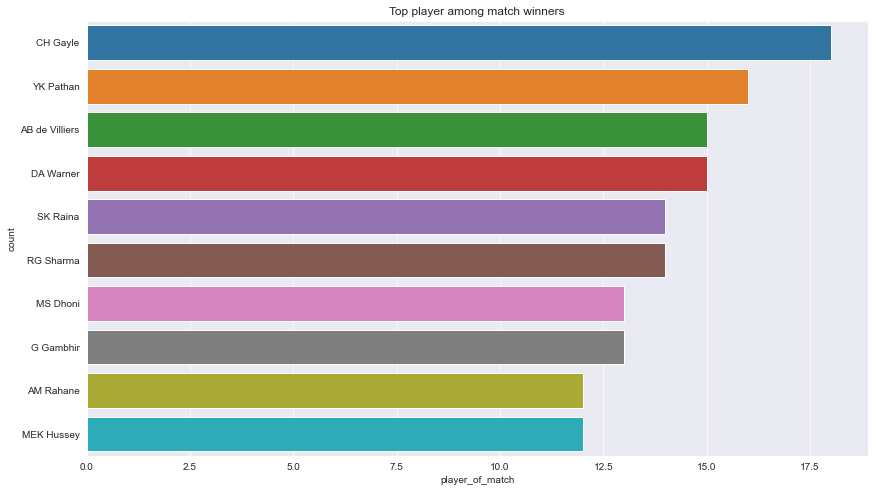

In [125]:
fig, ax = plt.subplots()
ax.set_ylabel("count")
ax.set_ylim([0,20])
ax.set_title("Top player among match winners")
sns.barplot(x=top_players, y=top_players.index, orient='h')
plt.show()


##### Q10 : Has Toss-winning helped in Match-winning?

In [129]:
matches.groupby(['toss_winner']).size()

toss_winner
Chennai Super Kings            66
Deccan Chargers                43
Delhi Daredevils               72
Gujarat Lions                  15
Kings XI Punjab                68
Kochi Tuskers Kerala            8
Kolkata Knight Riders          78
Mumbai Indians                 85
Pune Warriors                  20
Rajasthan Royals               63
Rising Pune Supergiant          6
Rising Pune Supergiants         7
Royal Challengers Bangalore    70
Sunrisers Hyderabad            35
dtype: int64

In [131]:
matches.groupby(['winner']).size()

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
dtype: int64

In [132]:
matches.groupby(['toss_winner']).size() - matches.groupby(['winner']).size()

toss_winner
Chennai Super Kings           -13
Deccan Chargers                14
Delhi Daredevils               10
Gujarat Lions                   2
Kings XI Punjab                -2
Kochi Tuskers Kerala            2
Kolkata Knight Riders           1
Mumbai Indians                 -7
Pune Warriors                   8
Rajasthan Royals                0
Rising Pune Supergiant         -4
Rising Pune Supergiants         2
Royal Challengers Bangalore    -3
Sunrisers Hyderabad            -7
dtype: int64

In [133]:
matches.groupby(['winner']).size() - matches.groupby(['toss_winner']).size()

winner
Chennai Super Kings            13
Deccan Chargers               -14
Delhi Daredevils              -10
Gujarat Lions                  -2
Kings XI Punjab                 2
Kochi Tuskers Kerala           -2
Kolkata Knight Riders          -1
Mumbai Indians                  7
Pune Warriors                  -8
Rajasthan Royals                0
Rising Pune Supergiant          4
Rising Pune Supergiants        -2
Royal Challengers Bangalore     3
Sunrisers Hyderabad             7
dtype: int64

In [138]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

In [139]:
round((ss.groupby(ss).size() / ss.count())* 100,2)

False    48.9
True     51.1
dtype: float64

##### COUNTPLOT :

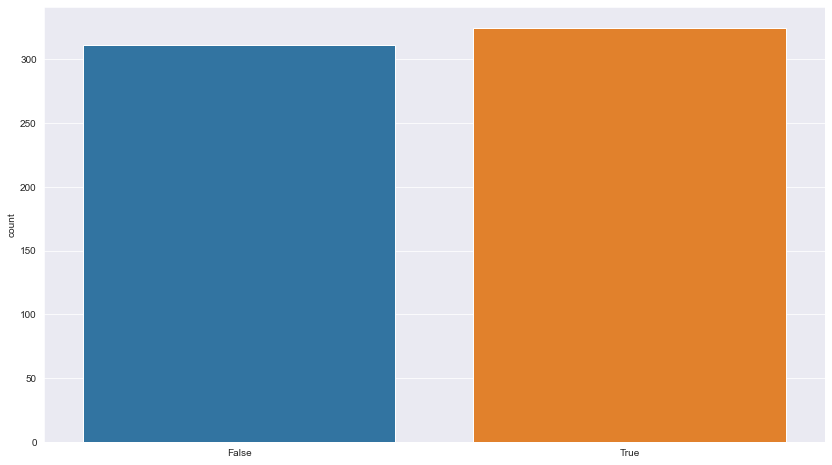

In [140]:
sns.countplot(ss)

##### Q11 : Team Performance

In [142]:
matches[matches['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rajasthan Royals               31.0
Rising Pune Supergiants        26.5
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Kolkata Knight Riders          23.0
Royal Challengers Bangalore    22.5
Kings XI Punjab                22.5
Rising Pune Supergiant         20.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            16.0
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

In [143]:
matches[matches['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Royal Challengers Bangalore    7.0
Rising Pune Supergiants        7.0
Kolkata Knight Riders          7.0
Pune Warriors                  6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Delhi Daredevils               6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64